In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0114101516,20140528T000000,310000.0,3.0,1.00,1430.0,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780.0,12697.0
1,9297300055,20150124T000000,650000.0,4.0,3.00,2950.0,5000,2,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140.0,4000.0
2,1202000200,20141103T000000,233000.0,3.0,2.00,1710.0,4697,1.5,0,0,...,6,1710,0,1941,0,98002,47.3048,-122.218,1030.0,4705.0
3,8562750320,20141110T000000,580500.0,3.0,2.50,2320.0,3980,2,0,0,...,8,2320,0,2003,0,98027,47.5391,-122.070,2580.0,3980.0
4,7589200193,20141110T000000,535000.0,3.0,1.00,1090.0,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570.0,5080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,8672200110,20150317T000000,1088000.0,5.0,3.75,4170.0,8142,2,0,2,...,10,4170,0,2006,0,98056,47.5354,-122.181,3030.0,7980.0
4225,5087900040,20141017T000000,350000.0,4.0,2.75,2500.0,5995,2,0,0,...,8,2500,0,2008,0,98042,47.3749,-122.107,2530.0,5988.0
4226,3448900210,20141014T000000,610685.0,4.0,2.50,2520.0,6023,2,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520.0,6023.0
4227,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0


In [25]:
def get_numpy_data(data_frame, feature:list, output:str):
    lst = ['constant']
    data_frame['constant'] = 1
    lst.extend(feature)
    feature_matrix = data_frame[lst].to_numpy()
    output_vector = data_frame[output].to_numpy()
    return feature_matrix, output_vector

In [5]:
def predict_output(feature_matrix, coefs):
    return feature_matrix @ coefs

In [7]:
def feature_derivatives_ridge(errors, feature, weight, l2_penalty, is_feature_constant):
    linear_reg_term = -2 * errors @ feature
    if is_feature_constant:
        return linear_reg_term
    return linear_reg_term + l2_penalty * weight * 2

# test derivatives

In [17]:
sales = pd.read_csv('kc_house_data.csv (2)/kc_house_data.csv')
example_features, example_output = get_numpy_data(sales, ['sqft_living'], 'price')
my_weights = np.array([1.0, 10.0])
test_pred = predict_output(example_features, my_weights)
errors = example_output - test_pred

print(feature_derivatives_ridge(errors, example_features[:,1], my_weights[1], 1, False))
print(-np.sum(errors*example_features[:,1])*2+20)

print(feature_derivatives_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(-np.sum(errors)*2)

-56554166815950.0
-56554166815950.0
-22446749330.0
-22446749330.0


# gradient descent function

In [35]:
def ridge_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iters=100):
    weights = initial_weights
    for i in range(max_iters):
        ypred = predict_output(feature_matrix, weights)
        errors = output - ypred
        for j in range(len(weights)):
            const = True if j==0 else False
            partiali = feature_derivatives_ridge(errors, feature_matrix[:,j], weights[j], l2_penalty, const)
            weights[j] -= step_size * partiali
    return weights

# l2-norm is decreased via l2-penalty

In [68]:
train_data = pd.read_csv('kc_house_train_data.csv/kc_house_train_data.csv', dtype=dtype_dict)
train_data = train_data.sort_values(['sqft_living','price'])
test_data = pd.read_csv('kc_house_test_data.csv/kc_house_test_data.csv', dtype=dtype_dict)
test_data = test_data.sort_values(['sqft_living','price'])

In [69]:
train_feature_matrix, train_output = get_numpy_data(train_data, ['sqft_living'], 'price')
test_feature_matrix, test_output = get_numpy_data(test_data, ['sqft_living'], 'price')

In [70]:
step_size = 1e-12
max_iter = 1000
initial_weights = np.array([0.0, 0.0])
simple_0_penalty_weights = ridge_gradient_descent(train_feature_matrix, train_output, np.array([0.0,0.0]), step_size, 0.0, max_iter)
print(simple_0_penalty_weights)
simple_high_penalty_weights = ridge_gradient_descent(train_feature_matrix, train_output, np.array([0.0,0.0]), step_size, 1.0e11, max_iter)
print(simple_high_penalty_weights)

[-1.63113515e-01  2.63024369e+02]
[  9.76730382 124.57217567]


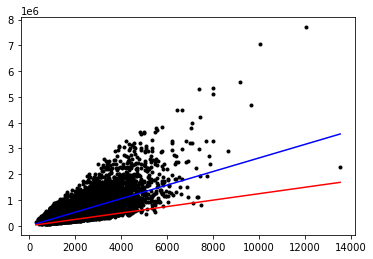

In [71]:
plt.plot(train_feature_matrix[:,1], train_output, 'k.',
        train_feature_matrix[:,1], predict_output(train_feature_matrix,simple_0_penalty_weights),'b-',
        train_feature_matrix[:,1], predict_output(train_feature_matrix,simple_high_penalty_weights),'r-')

In [75]:
rss_0 = np.linalg.norm(test_output - predict_output(test_feature_matrix, initial_weights))**2
rss_0_penalty = np.linalg.norm(test_output - predict_output(test_feature_matrix, simple_0_penalty_weights)) **2
rss_high_penalty = np.linalg.norm(test_output - predict_output(test_feature_matrix, simple_high_penalty_weights))**2
print('%.2e, %.2e, %.2e'%(rss_0,rss_0_penalty,rss_high_penalty))

1.78e+15, 2.76e+14, 6.95e+14


# two features ridge regression

In [76]:
train_feature_matrix,train_output = get_numpy_data(train_data, ['sqft_living','sqft_living15'], 'price')
test_feature_matrix,test_output = get_numpy_data(test_data, ['sqft_living','sqft_living15'], 'price')

In [77]:
mulitple_0_penalty_weights = ridge_gradient_descent(train_feature_matrix, train_output, np.array([0.0,0.0,0.0]), 1e-12, 0.0, max_iters=1000)
mulitple_high_penalty_weights = ridge_gradient_descent(train_feature_matrix, train_output, np.array([0.0,0.0,0.0]), 1e-12, 1.0e11, max_iters=1000)

In [78]:
print(mulitple_0_penalty_weights)
print(mulitple_high_penalty_weights)

[ -0.35743483 243.05416982  22.41481497]
[ 6.74296579 91.48927365 78.43658766]


In [79]:
rss_0 = np.linalg.norm(test_output - predict_output(test_feature_matrix,np.array([0.0,0.0,0.0])))**2
rss_0_penalty = np.linalg.norm(test_output - predict_output(test_feature_matrix, mulitple_0_penalty_weights)) **2
rss_high_penalty = np.linalg.norm(test_output - predict_output(test_feature_matrix, mulitple_high_penalty_weights))**2
print('%.2e, %.2e, %.2e'%(rss_0,rss_0_penalty,rss_high_penalty))

1.78e+15, 2.74e+14, 5.00e+14


In [81]:
print(test_output[0])
print(predict_output(test_feature_matrix[0,:], mulitple_0_penalty_weights))
print(predict_output(test_feature_matrix[0,:], mulitple_high_penalty_weights))

276000.0
119965.53746060442
138962.80168411497
